In [1]:
import uproot	
import numpy as np
import sys
import os
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import itertools
import awkward as ak
from scipy.optimize import curve_fit
from mpl_toolkits.axes_grid1 import ImageGrid
%matplotlib inline

In [2]:
matplotlib.matplotlib_fname()

'/home/lhcb/cetin/.config/matplotlib/matplotlibrc'

In [3]:
file = uproot.open("tracking_losses_ntuple_Bd2KstEE.root:PrDebugTrackingLosses.PrDebugTrackingTool/Tuple;1")

#selektiere nur elektronen von B->K*ee und nur solche mit einem momentum von ueber 5 GeV 
allcolumns = file.arrays()
found = allcolumns[(allcolumns.isElectron) & (~allcolumns.lost) & (allcolumns.fromSignal) & (allcolumns.p > 5e3)] #B: 9056
lost = allcolumns[(allcolumns.isElectron) & (allcolumns.lost) & (allcolumns.fromSignal) & (allcolumns.p > 5e3)] #B: 1466

ak.num(found, axis=0) + ak.num(lost, axis=0)
#ak.count(found, axis=None)

10522

In [4]:
for i in range(10):
	print(found["brem_vtx_x_length"][i], found["brem_vtx_z_length"][i])

10 10
10 10
10 10
15 15
7 7
7 7
8 8
3 3
5 5
15 15


In [5]:
def t_eff(found, lost, axis = 0):
    sel = ak.num(found, axis=axis)
    des = ak.num(lost, axis=axis)
    return sel/(sel + des)

def eff_err(found, lost):
    n_f = ak.num(found, axis=0)
    n_all = ak.num(found, axis=0) + ak.num(lost,axis=0)
    return 1/n_all * np.sqrt(np.abs(n_f*(1-n_f/n_all)))


print("eff all = ", t_eff(found, lost), "+/-", eff_err(found, lost))

eff all =  0.8606728758791105 +/- 0.003375885792719708


In [6]:
#try excluding all photons that originate from a vtx @ z>9500mm
#ignore all brem vertices @ z>9500mm 

#found

brem_e_f = found["brem_photons_pe"]
brem_z_f = found["brem_vtx_z"]
brem_x_f = found["brem_vtx_x"]
e_f = found["energy"]
length_f = found["brem_vtx_z_length"]

brem_f = ak.ArrayBuilder()

for itr in range(ak.num(found,axis=0)):
    brem_f.begin_record()
    #[:,"energy"] energy
    brem_f.field("energy").append(e_f[itr])
    #[:,"photon_length"] number of vertices
    brem_f.field("photon_length").integer(length_f[itr])
    #[:,"brem_photons_pe",:] photon energy 
    brem_f.field("brem_photons_pe").append(brem_e_f[itr])
    #[:,"brem_vtx_z",:] brem vtx z
    brem_f.field("brem_vtx_z").append(brem_z_f[itr])
    brem_f.field("brem_vtx_x").append(brem_x_f[itr])
    brem_f.end_record()

brem_f = ak.Array(brem_f)

#lost

brem_e_l = lost["brem_photons_pe"]
brem_z_l = lost["brem_vtx_z"]
brem_x_l = lost["brem_vtx_x"]
e_l = lost["energy"]
length_l = lost["brem_vtx_z_length"]

brem_l = ak.ArrayBuilder()

for itr in range(ak.num(lost,axis=0)):
    brem_l.begin_record()
    #[:,"energy"] energy
    brem_l.field("energy").append(e_l[itr])
    #[:,"photon_length"] number of vertices
    brem_l.field("photon_length").integer(length_l[itr])
    #[:,"brem_photons_pe",:] photon energy 
    brem_l.field("brem_photons_pe").append(brem_e_l[itr])
    #[:,"brem_vtx_z",:] brem vtx z
    brem_l.field("brem_vtx_z").append(brem_z_l[itr])
    brem_l.field("brem_vtx_x").append(brem_x_l[itr])
    brem_l.end_record()

brem_l = ak.Array(brem_l)




brem_f[0]

<Record {energy: 4.62e+04, ...} type='{energy: float64, photon_length: int6...'>

In [7]:
acc_brem_found = ak.ArrayBuilder()

for itr in range(ak.num(brem_f, axis=0)):
    acc_brem_found.begin_record()
    acc_brem_found.field("energy").real(brem_f[itr,"energy"])
    
    acc_brem_found.field("brem_photons_pe")
    acc_brem_found.begin_list()
    for jentry in range(brem_f[itr, "photon_length"]):
        if brem_f[itr, "brem_vtx_z", jentry]>9500:
            continue
        else:
            acc_brem_found.real(brem_f[itr,"brem_photons_pe", jentry])
            
            #acc_brem_found.field("brem_vtx_z").real(brem_f[itr, "brem_vtx_z",jentry])
    acc_brem_found.end_list()
    
    acc_brem_found.field("brem_vtx_z")
    acc_brem_found.begin_list()
    for jentry in range(brem_f[itr, "photon_length"]):
        if brem_f[itr, "brem_vtx_z", jentry]>9500:
            continue
        else:
            acc_brem_found.real(brem_f[itr, "brem_vtx_z",jentry])
    acc_brem_found.end_list()
    
    acc_brem_found.field("brem_vtx_x")
    acc_brem_found.begin_list()
    for jentry in range(brem_f[itr, "photon_length"]):
        if brem_f[itr, "brem_vtx_z", jentry]>9500:
            continue
        else:
            acc_brem_found.real(brem_f[itr, "brem_vtx_x",jentry])
    acc_brem_found.end_list()
    

    
    acc_brem_found.end_record()

acc_brem_found = ak.Array(acc_brem_found)



acc_brem_lost = ak.ArrayBuilder()

for itr in range(ak.num(brem_l, axis=0)):
    acc_brem_lost.begin_record()
    acc_brem_lost.field("energy").real(brem_l[itr,"energy"])
    
    acc_brem_lost.field("brem_photons_pe")
    acc_brem_lost.begin_list()
    for jentry in range(brem_l[itr, "photon_length"]):
        if brem_l[itr, "brem_vtx_z", jentry]>9500:
            continue
        else:
            acc_brem_lost.real(brem_l[itr,"brem_photons_pe", jentry])
            
            #acc_brem_found.field("brem_vtx_z").real(brem_f[itr, "brem_vtx_z",jentry])
    acc_brem_lost.end_list()
    
    acc_brem_lost.field("brem_vtx_z")
    acc_brem_lost.begin_list()
    for jentry in range(brem_l[itr, "photon_length"]):
        if brem_l[itr, "brem_vtx_z", jentry]>9500:
            continue
        else:
            acc_brem_lost.real(brem_l[itr, "brem_vtx_z",jentry])
    acc_brem_lost.end_list()
    
    acc_brem_lost.field("brem_vtx_x")
    acc_brem_lost.begin_list()
    for jentry in range(brem_l[itr, "photon_length"]):
        if brem_l[itr, "brem_vtx_z", jentry]>9500:
            continue
        else:
            acc_brem_lost.real(brem_l[itr, "brem_vtx_x",jentry])
    acc_brem_lost.end_list()
    
    acc_brem_lost.end_record()

acc_brem_lost = ak.Array(acc_brem_lost)


In [8]:
ak.num(acc_brem_found,axis=0)

9056

In [9]:

"""
ph_e = found["brem_photons_pe"]
event_cut = ak.all(ph_e<cutoff_energy,axis=1)
ph_e = ph_e[event_cut]
"""



'\nph_e = found["brem_photons_pe"]\nevent_cut = ak.all(ph_e<cutoff_energy,axis=1)\nph_e = ph_e[event_cut]\n'

In [10]:
#finden wir die elektronen die keine bremsstrahlung gemacht haben mit hoher effizienz?
#von energie der photonen abmachen
#scan ab welcher energie der photonen die effizienz abfällt

#abhängigkeit vom ort der emission untersuchen   <- noch nicht gemacht



#idea: we make an event cut st all events that contain a photon of energy > cutoff_energy are not included
"""
ph_e = acc_brem_found["brem_photons_pe"]
event_cut = ak.all(ph_e<cutoff_energy,axis=1)
ph_e = ph_e[event_cut]
"""

efficiencies_found = []
deff_found = []


for cutoff_energy in range(0,30050,1000):
	nobrem_f = acc_brem_found[ak.sum(acc_brem_found["brem_photons_pe"],axis=-1,keepdims=False)<cutoff_energy]
	nobrem_l = acc_brem_lost[ak.sum(acc_brem_lost["brem_photons_pe"],axis=-1,keepdims=False)<cutoff_energy]

	if ak.num(nobrem_f,axis=0)+ak.num(nobrem_l,axis=0)==0:
		efficiencies_found.append(0)
		deff_found.append(0)
		continue
	
	eff = t_eff(nobrem_f, nobrem_l)
	deff = eff_err(nobrem_f,nobrem_l)
	efficiencies_found.append(eff)
	deff_found.append(deff)
	#print("cutoff = ",str(cutoff_energy) ,"MeV, sample size: ",ak.num(nobrem_f,axis=0)+ak.num(nobrem_l,axis=0))
	#print("eff = ",np.round(t_eff(nobrem_f,nobrem_l),4), "+/-", np.round(eff_err(nobrem_f, nobrem_l),4))

"""
we see that a cutoff energy of xxxMeV is ideal because the efficiency drops significantly for higher values
"""
cutoff_energy = 350.0 #MeV

"""
better statistics: cutoff=xxxMeV - sample size: xxx events and efficiency=xxxx
"""
nobrem_found = acc_brem_found[ak.sum(acc_brem_found["brem_photons_pe"],axis=-1,keepdims=False)<cutoff_energy]
nobrem_lost = acc_brem_lost[ak.sum(acc_brem_lost["brem_photons_pe"],axis=-1,keepdims=False)<cutoff_energy]

print("\ncutoff energy = 350MeV, sample size:",ak.num(nobrem_found,axis=0)+ak.num(nobrem_lost,axis=0))
print("eff = ",np.round(t_eff(nobrem_found, nobrem_lost),4), "+/-", np.round(eff_err(nobrem_found, nobrem_lost),4))


cutoff energy = 350MeV, sample size: 693
eff =  0.9481 +/- 0.0084


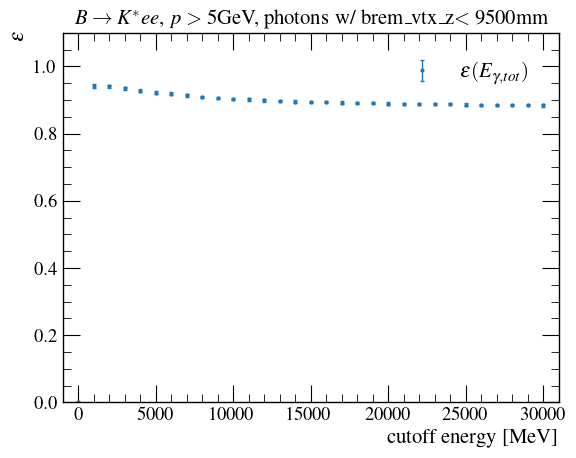

In [11]:
x_ = np.arange(0,30050,step=1000)

plt.errorbar(x_,efficiencies_found, yerr=deff_found, ls="", fmt=".", label="$\epsilon(E_{\gamma,tot})$ ") #, capsize=1)	
plt.xlabel("cutoff energy [MeV]")
plt.ylabel(r"$\epsilon$")
plt.title(r'$B\rightarrow K^\ast ee$, $p>5$GeV, photons w/ brem_vtx_z$<9500$mm')
plt.ylim([0,1.1])
plt.xlim([-1000,31000])
"""
plt.yticks(np.arange(0,1.04,step=0.02),minor=True)
plt.xticks(np.arange(-200,10400,step=200),minor=True)

plt.tick_params(left=True, bottom=True, top=True, right=True,
				labelleft=True, labelbottom=True, labeltop=False, labelright=False,
				which="major",direction="in", length=12, labelsize="large")
plt.tick_params(left=True, bottom=True, top=True, right=True,
				labelleft=True, labelbottom=True, labeltop=False, labelright=False,
				which="minor",direction="in", length=6)
"""
plt.legend()
plt.show()

In [12]:
#wie viel energie relativ zur anfangsenergie verlieren die elektronen durch bremstrahlung und hat das einen einfluss darauf ob wir sie finden oder nicht?
#if any photon of an electron has an energy higher the cutoff then it is included
cutoff_energy=350

brem_found = acc_brem_found[ak.sum(acc_brem_found["brem_photons_pe"],axis=-1,keepdims=False)>=cutoff_energy]
energy_found = ak.to_numpy(brem_found["energy"])
eph_found = ak.to_numpy(ak.sum(brem_found["brem_photons_pe"], axis=-1, keepdims=False))
residual_found = energy_found - eph_found
energyloss_found = eph_found/energy_found

brem_lost = acc_brem_lost[ak.sum(acc_brem_lost["brem_photons_pe"],axis=-1,keepdims=False)>=cutoff_energy]
energy_lost = ak.to_numpy(brem_lost["energy"])
eph_lost = ak.to_numpy(ak.sum(brem_lost["brem_photons_pe"], axis=-1, keepdims=False))
residual_lost = energy_lost - eph_lost
energyloss_lost = eph_lost/energy_lost

print("eff = ", np.round(t_eff(brem_found,brem_lost),4), "+/-", np.round(eff_err(brem_found, brem_lost),4))
brem_lost

eff =  0.8545 +/- 0.0036


<Array [{energy: 2.58e+04, ...}, ..., {...}] type='1430 * {energy: float64,...'>

In [13]:
mean_energyloss_found = ak.mean(energyloss_found)
mean_energyloss_lost = ak.mean(energyloss_lost)
print("mean energyloss relative to initial energy (found): ", mean_energyloss_found)
print("mean energyloss relative to initial energy (lost): ", mean_energyloss_lost)

mean energyloss relative to initial energy (found):  0.40459562244424735
mean energyloss relative to initial energy (lost):  0.7244570697471976


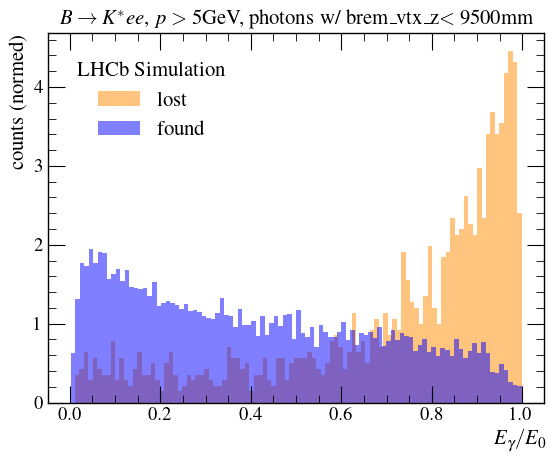

In [14]:
#in abhängigkeit von der energie der elektronen
plt.hist(energyloss_lost, bins=100, density=True, alpha=0.5, histtype='bar', color="darkorange", label="lost")
plt.hist(energyloss_found, bins=100, density=True, alpha=0.5, histtype='bar', color="blue", label="found")
#plt.xticks(np.arange(0,1.1,0.1), minor=True,)
#plt.yticks(np.arange(0,5.5,0.5), minor=True)
plt.xlabel(r"$E_\gamma/E_0$")
plt.ylabel("counts (normed)")
plt.title(r'$B\rightarrow K^\ast ee$, $p>5$GeV, photons w/ brem_vtx_z$<9500$mm')
plt.legend(title="LHCb Simulation", title_fontsize=15)
#plt.grid()

"""

"""

plt.show()

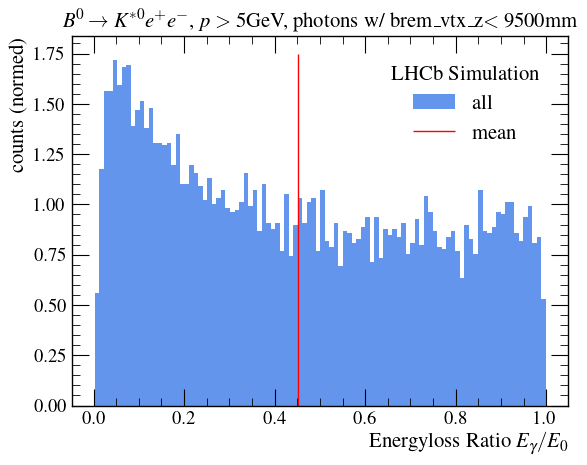

In [15]:
both_eloss = np.append(energyloss_found,energyloss_lost)
plt.hist(both_eloss, bins=100, density=True, histtype='bar', color="cornflowerblue", label="all")
plt.vlines(ak.mean(both_eloss),0,1.75,colors="red", label="mean")
plt.xlabel(r"Energyloss Ratio $E_\gamma/E_0$")
plt.ylabel("counts (normed)")
plt.title(r'$B^0\rightarrow K^{\ast 0} e^+e^-$, $p>5$GeV, photons w/ brem_vtx_z$<9500$mm')
plt.legend(title="LHCb Simulation", title_fontsize=15)
plt.show()

In [16]:
brem_z_found = ak.to_numpy(ak.flatten(acc_brem_found["brem_vtx_z"]))
brem_x_found = ak.to_numpy(ak.flatten(acc_brem_found["brem_vtx_x"]))

brem_z_lost = ak.to_numpy(ak.flatten(acc_brem_lost["brem_vtx_z"]))
brem_x_lost = ak.to_numpy(ak.flatten(acc_brem_lost["brem_vtx_x"]))

In [17]:
x_lost=np.array([])
z_lost=np.array([])

for i in range(4):
    x_lost = np.append(x_lost, brem_x_lost)
    z_lost = np.append(z_lost, brem_z_lost)

len(brem_z_lost)

7935

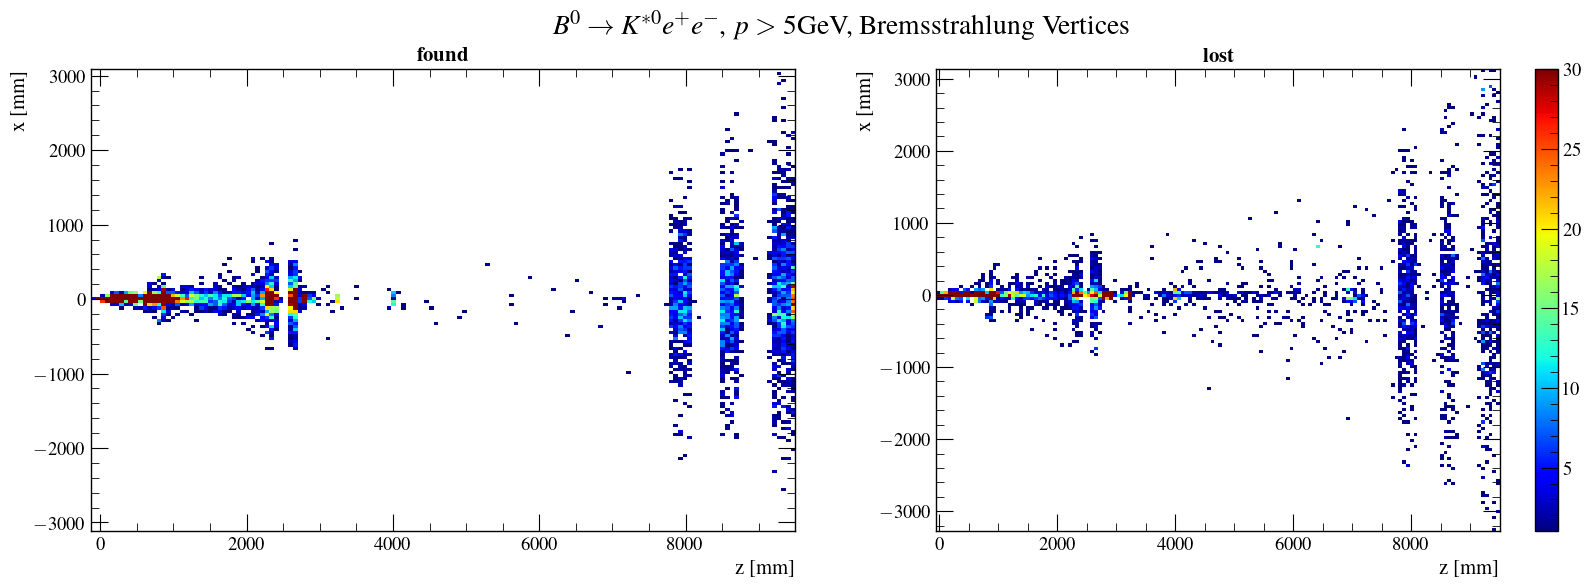

In [21]:
nbins = 150
nmax = 30

fig, ((ax0, ax1)) = plt.subplots(nrows=1, ncols=2, figsize=(20,6))

a0 = ax0.hist2d(brem_z_found[:18000], brem_x_found[:18000], bins=nbins, density=False, cmap=plt.cm.jet, cmin=2, vmax=nmax)
ax0.set_xlabel("z [mm]")
ax0.set_ylabel("x [mm]")
ax0.set_title(r"\bf{}found")

#a1 = ax1.hist2d(z_lost, x_lost, bins=nbins, density=False, cmap=plt.cm.jet, cmin=2, vmax=nmax)
a1 = ax1.hist2d(brem_z_lost, brem_x_lost, bins=nbins, density=False, cmap=plt.cm.jet, cmin=1, vmax=nmax)
ax1.set_xlabel("z [mm]")
ax1.set_ylabel("x [mm]")
ax1.set_title(r"\bf{}lost")
#ax1.set(xlim=(0,4000), ylim=(-1000,1000))

plt.suptitle(r"$B^0\rightarrow K^{\ast 0}e^+e^-$, $p>5$GeV, Bremsstrahlung Vertices")
plt.colorbar(a1[3], ax=ax1)
plt.show()

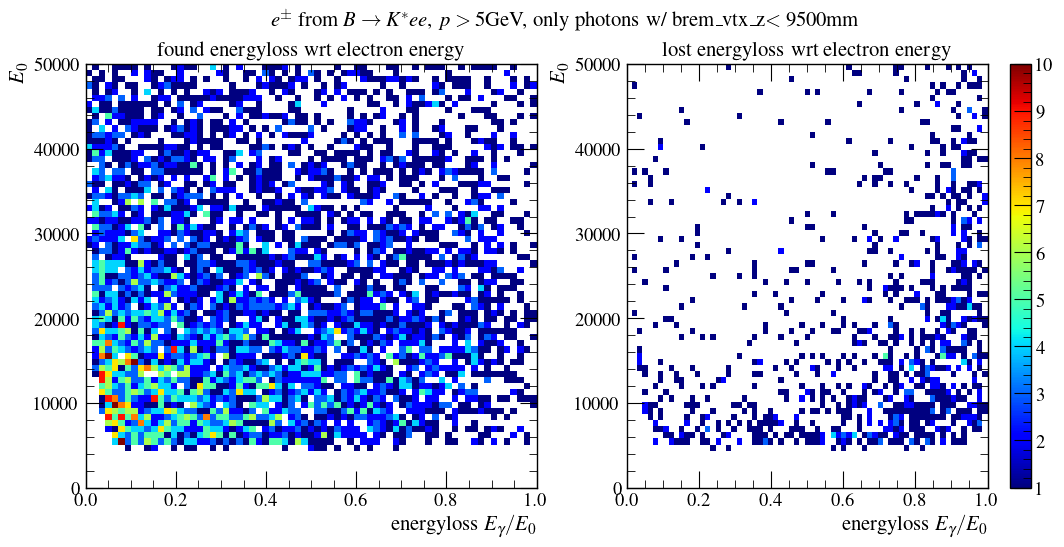

In [14]:
#energyloss in abh von der energie der elektronen
fig, ((ax0, ax1)) = plt.subplots(nrows=1, ncols=2, figsize=(12.8,5.5))

a0=ax0.hist2d(energyloss_found, energy_found, bins=(np.linspace(0,1,70), np.linspace(0,5e4,70)), cmap=plt.cm.jet, cmin=1, vmax=10)
ax0.set_ylim(0,5e4)
ax0.set_xlim(0,1)
ax0.set_xlabel(r"energyloss $E_\gamma/E_0$")
ax0.set_ylabel(r"$E_0$")
ax0.set_title("found energyloss wrt electron energy")

a1=ax1.hist2d(energyloss_lost, energy_lost, bins=(np.linspace(0,1,70), np.linspace(0,5e4,70)), cmap=plt.cm.jet, cmin=1, vmax=10) 
ax1.set_ylim(0,5e4)
ax1.set_xlim(0,1)
ax1.set_xlabel(r"energyloss $E_\gamma/E_0$")
ax1.set_ylabel(r"$E_0$")
ax1.set_title("lost energyloss wrt electron energy")

fig.colorbar(a1[3],ax=ax1)
fig.suptitle(r"$e^\pm$ from $B\rightarrow K^\ast ee$, $p>5$GeV, only photons w/ brem_vtx_z$<9500$mm")

"""
we can see that high energy electrons are often found even though they emit a lot of their energy through bremsstrahlung
"""
plt.show()

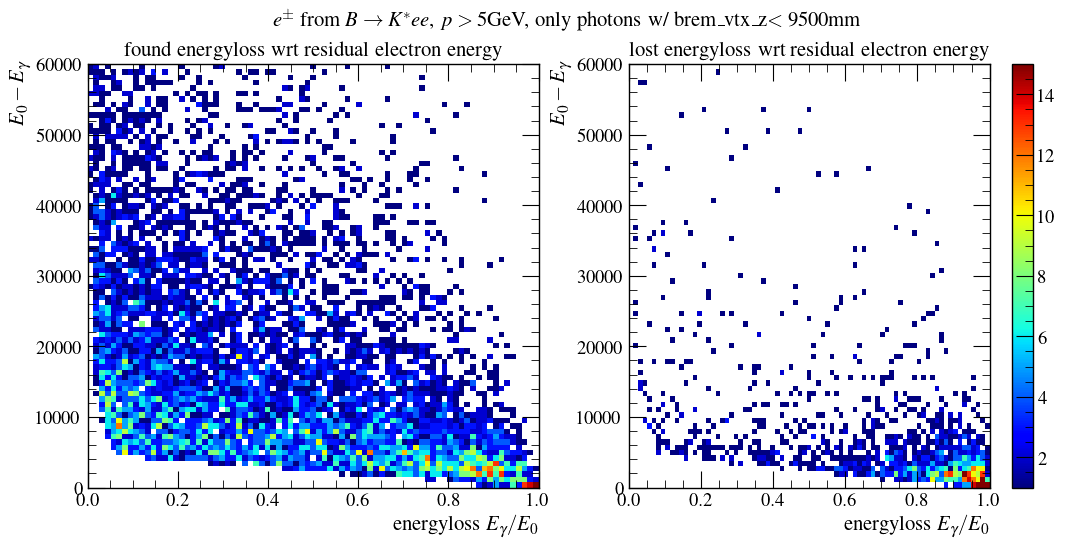

In [15]:
#plot residual energy against energyloss and try to find a good split (eg energyloss before and after the magnet)
fig, ((ax0, ax1)) = plt.subplots(nrows=1, ncols=2, figsize=(12.8,5.5))

a0=ax0.hist2d(energyloss_found, residual_found, bins=(np.linspace(0,1,80), np.linspace(0,6e4,80)), cmap=plt.cm.jet, cmin=1, vmax=15)
ax0.set_ylim(0,6e4)
ax0.set_xlim(0,1)
ax0.set_xlabel(r"energyloss $E_\gamma/E_0$")
ax0.set_ylabel(r"$E_0-E_\gamma$")
ax0.set_title("found energyloss wrt residual electron energy")

a1=ax1.hist2d(energyloss_lost, residual_lost, bins=(np.linspace(0,1,80), np.linspace(0,6e4,80)), cmap=plt.cm.jet, cmin=1, vmax=15) 
ax1.set_ylim(0,6e4)
ax1.set_xlim(0,1)
ax1.set_xlabel(r"energyloss $E_\gamma/E_0$")
ax1.set_ylabel(r"$E_0-E_\gamma$")
ax1.set_title("lost energyloss wrt residual electron energy")

fig.colorbar(a1[3],ax=ax1)
fig.suptitle(r"$e^\pm$ from $B\rightarrow K^\ast ee$, $p>5$GeV, only photons w/ brem_vtx_z$<9500$mm")

"""
"""
plt.show()

In [16]:
#ist die shape der teilspur im scifi anders? (koenntest du zum beispiel durch vergleich der verteilungen der fit parameter studieren,
#in meiner thesis findest du das fitmodell -- ist einfach ein polynom dritten grades)
z_ref=8520 #mm

def scifi_track(z, a, b, c, d):
    return a + b*(z-z_ref) + c*(z-z_ref)**2 + d*(z-z_ref)**3

def z_mag(xv, zv, tx, a, b):
    """ optical centre of the magnet is defined as the intersection between the trajectory tangents before and after the magnet

    Args:
        xv (double): velo x track
        zv (double): velo z track
        tx (double): velo x slope
        a (double): ax parameter of track fit
        b (double): bx parameter of track fit

    Returns:
        double: z_mag
    """
    return (xv-tx*zv-a+b*z_ref)/(b-tx)

In [17]:
scifi_found = found[found["scifi_hit_pos_x_length"]>3]
scifi_lost = lost[lost["scifi_hit_pos_x_length"]>3]
#should be fulfilled by all candidates

scifi_x_found = scifi_found["scifi_hit_pos_x"]
scifi_z_found = scifi_found["scifi_hit_pos_z"]

tx_found = scifi_found["velo_track_tx"]

scifi_x_lost = scifi_lost["scifi_hit_pos_x"]
scifi_z_lost = scifi_lost["scifi_hit_pos_z"]

tx_lost = scifi_lost["velo_track_tx"]

xv_found = scifi_found["velo_track_x"]
zv_found = scifi_found["velo_track_z"]

xv_lost = scifi_lost["velo_track_x"]
zv_lost = scifi_lost["velo_track_z"]



sf_energy_found = ak.to_numpy(scifi_found["energy"])
sf_eph_found = ak.to_numpy(ak.sum(scifi_found["brem_photons_pe"], axis=-1, keepdims=False))
sf_vtx_type_found = scifi_found["all_endvtx_types"]


sf_energy_lost = ak.to_numpy(scifi_lost["energy"])
sf_eph_lost = ak.to_numpy(ak.sum(scifi_lost["brem_photons_pe"], axis=-1, keepdims=False))
sf_vtx_type_lost = scifi_lost["all_endvtx_types"]



#ak.num(scifi_found["energy"], axis=0)
#scifi_found.snapshot()

In [18]:
ak.num(scifi_found["energy"], axis=0)
scifi_found["all_endvtx_types"][1,:]

<Array [101, 101, 101, 101, 101, ..., 101, 101, 101, 0] type='11 * float32'>

In [19]:
scifi_fitpars_found = ak.ArrayBuilder()
vtx_types_found = ak.ArrayBuilder()

for i in range(0,ak.num(scifi_found, axis=0)):
    popt, pcov = curve_fit(scifi_track,ak.to_numpy(scifi_z_found[i,:]),ak.to_numpy(scifi_x_found[i,:]))
    scifi_fitpars_found.begin_list()
    scifi_fitpars_found.real(popt[0])
    scifi_fitpars_found.real(popt[1])
    scifi_fitpars_found.real(popt[2])
    scifi_fitpars_found.real(popt[3])
    #[:,4] -> energy 
    scifi_fitpars_found.real(sf_energy_found[i])
    #[:,5] -> photon energy
    scifi_fitpars_found.real(sf_eph_found[i])
    scifi_fitpars_found.end_list()
    
    vtx_types_found.begin_list()
    #[:,0] -> endvtx_type
    vtx_types_found.extend(sf_vtx_type_found[i,:])
    vtx_types_found.end_list()
    

scifi_fitpars_lost = ak.ArrayBuilder()
vtx_types_lost = ak.ArrayBuilder()

for i in range(0,ak.num(scifi_lost, axis=0)):
    popt, pcov = curve_fit(scifi_track,ak.to_numpy(scifi_z_lost[i,:]),ak.to_numpy(scifi_x_lost[i,:]))
    scifi_fitpars_lost.begin_list()
    scifi_fitpars_lost.real(popt[0])
    scifi_fitpars_lost.real(popt[1])
    scifi_fitpars_lost.real(popt[2])
    scifi_fitpars_lost.real(popt[3])
    #[:,4] -> energy 
    scifi_fitpars_lost.real(sf_energy_lost[i])
    #[:,5] -> photon energy
    scifi_fitpars_lost.real(sf_eph_lost[i])
    scifi_fitpars_lost.end_list()
    
    vtx_types_lost.begin_list()
    #endvtx_type
    vtx_types_lost.extend(sf_vtx_type_lost[i,:])
    vtx_types_lost.end_list()
    


scifi_fitpars_lost = ak.to_numpy(scifi_fitpars_lost)
scifi_fitpars_found = ak.to_numpy(scifi_fitpars_found)

vtx_types_lost = ak.Array(vtx_types_lost)
vtx_types_found = ak.Array(vtx_types_found)



In [20]:
vtx_types_found[0]

<Array [101, 101, 101, 101, 101, ..., 101, 101, 101, 0] type='11 * float64'>

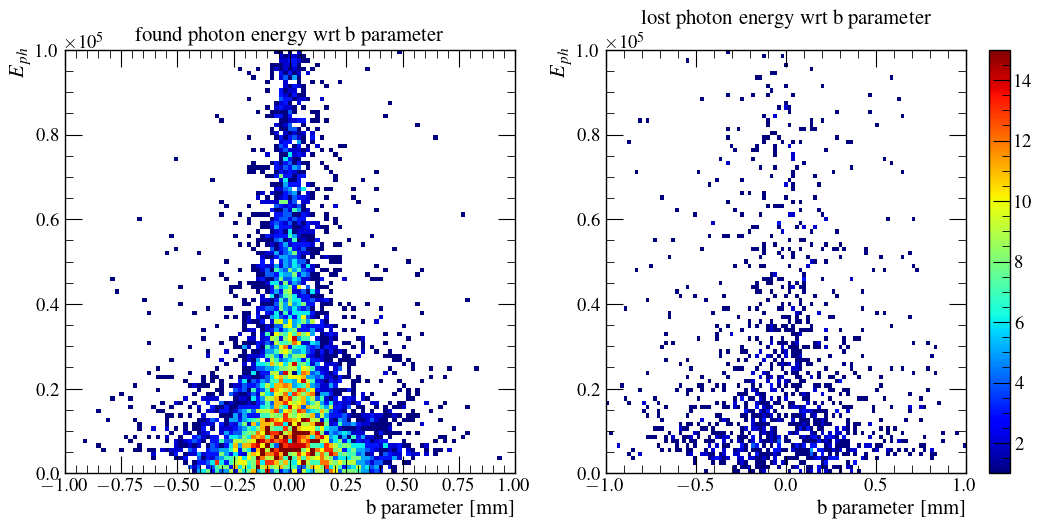

In [21]:
#b parameter des fits [:,1] hat für lost eine breitere Verteilung. Warum?
#evtl multiple scattering candidates (lost); findet man einen gewissen endvtx_type (mult scattering)
#steiler velo winkel (eta)? vertex type? evtl bremsstrahlung?

#isolate b parameters for analysis
b_found = scifi_fitpars_found[:,1]
b_lost = scifi_fitpars_lost[:,1]

brem_energy_found = scifi_fitpars_found[:,5]
brem_energy_lost = scifi_fitpars_lost[:,5]


bs_found, vtxs_types_found = ak.broadcast_arrays(b_found, vtx_types_found)
bs_found = ak.to_numpy(ak.ravel(bs_found))
vtxs_types_found = ak.to_numpy(ak.ravel(vtxs_types_found))

bs_lost, vtxs_types_lost = ak.broadcast_arrays(b_lost, vtx_types_lost)
bs_lost = ak.to_numpy(ak.ravel(bs_lost))
vtxs_types_lost = ak.to_numpy(ak.ravel(vtxs_types_lost))




#Erste Annahme ist Bremsstrahlung

fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(12.8,5.5))


n_bins = (np.linspace(-1,1,100), np.linspace(0,1e5,100))

h0 = axes[0].hist2d(b_found, brem_energy_found, bins=n_bins, cmap=plt.cm.jet, cmin=1,vmax=15)
axes[0].set_xlim(-1,1)
axes[0].set_ylim(0,1e5)
axes[0].set_xlabel("b parameter [mm]")
axes[0].set_ylabel(r"$E_{ph}$")
axes[0].set_title("found photon energy wrt b parameter")

h1 = axes[1].hist2d(b_lost, brem_energy_lost, bins=n_bins, cmap=plt.cm.jet, cmin=1,vmax=15)
axes[1].set_xlim(-1,1)
axes[1].set_ylim(0,1e5)
axes[1].set_xlabel("b parameter [mm]")
axes[1].set_ylabel(r"$E_{ph}$")
axes[1].set_title("lost photon energy wrt b parameter")

fig.colorbar(h1[3], ax=axes[1])

"""
"""

plt.show()

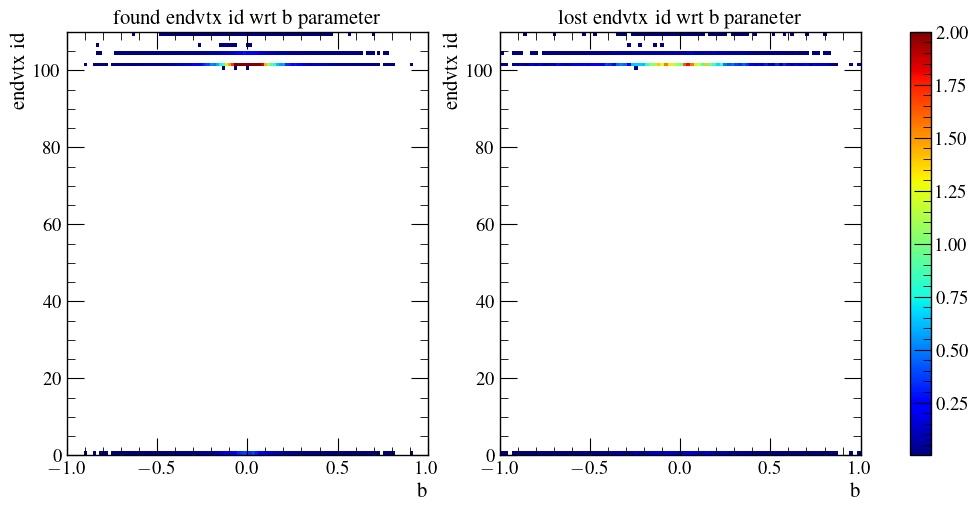

In [22]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12.8,5.5))

a0=ax[0].hist2d(bs_found, vtxs_types_found, bins=110, density=True, cmap=plt.cm.jet, cmin=1e-20,vmax=2)
ax[0].set_ylim(0,110)
ax[0].set_xlim(-1,1)
ax[0].set_xlabel("b")
ax[0].set_ylabel("endvtx id")
ax[0].set_title("found endvtx id wrt b parameter")
#ax[0].set_yticks(np.arange(0,110,1),minor=True)

a1=ax[1].hist2d(bs_lost, vtxs_types_lost, bins=110, density=True, cmap=plt.cm.jet, cmin=1e-20,vmax=2)
ax[1].set_ylim(0,110)
ax[1].set_xlim(-1,1)
ax[1].set_xlabel("b")
ax[1].set_ylabel("endvtx id")
ax[1].set_title("lost endvtx id wrt b paraneter")
#ax[1].set_yticks(np.arange(0,110,1), minor=True)

"""
vtx_id: 101 - Bremsstrahlung
B:
wir können nicht wirklich sagen dass bei den lost teilchen jegliche endvertex types überwiegen, im gegensatz zu den found 
"""
fig.colorbar(a0[3], ax=ax, orientation='vertical',)
plt.show()

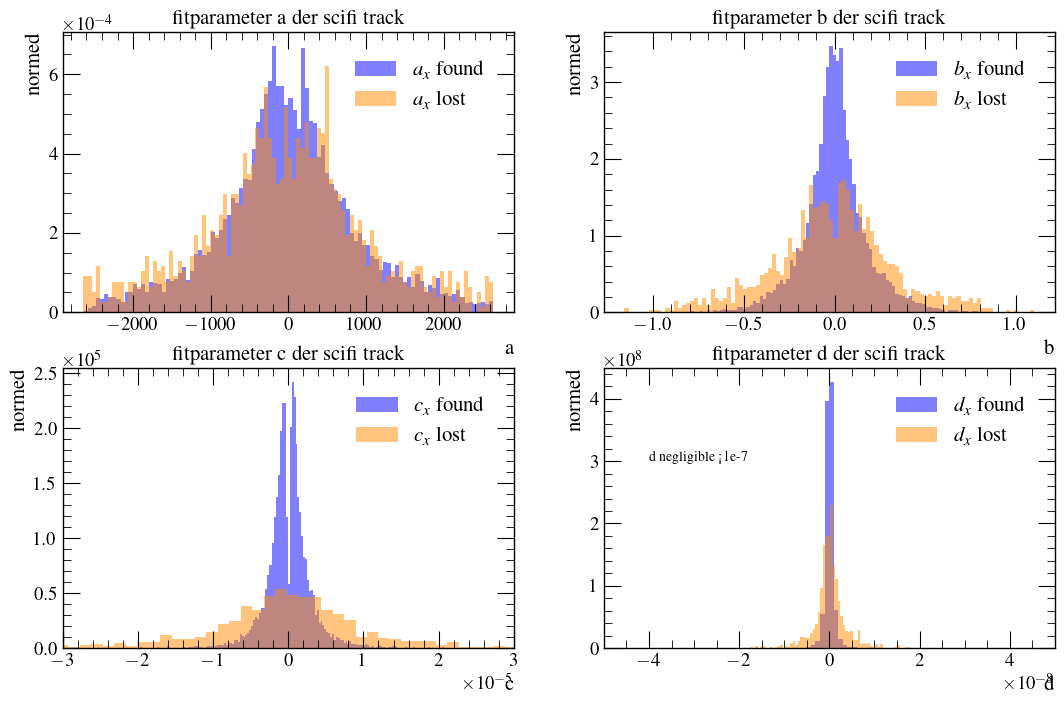

In [23]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2, figsize=(12.8,8))

ax0.hist(scifi_fitpars_found[:,0], bins=100, density=True, alpha=0.5, histtype='bar', color="blue", label=r"$a_x$ found")
ax0.hist(scifi_fitpars_lost[:,0], bins=100, density=True, alpha=0.5, histtype='bar', color="darkorange", label=r"$a_x$ lost")
ax0.set_xlabel("a")
ax0.set_ylabel("normed")
ax0.set_title("fitparameter a der scifi track")
ax0.legend()

ax1.hist(scifi_fitpars_found[:,1], bins=100, density=True, alpha=0.5, histtype='bar', color="blue", label=r"$b_x$ found")
ax1.hist(scifi_fitpars_lost[:,1], bins=100, density=True, alpha=0.5, histtype='bar', color="darkorange", label=r"$b_x$ lost")
ax1.set_xticks(np.arange(-1,1,0.1),minor=True)
ax1.set_xlabel("b")
ax1.set_ylabel("normed")
ax1.set_title("fitparameter b der scifi track")
ax1.legend()
#evtl multiple scattering candidates (lost); findet man einen gewissen endvtx_type (mult scattering)
#steiler velo winkel (eta)? vertex type? evtl bremsstrahlung?


ax2.hist(scifi_fitpars_found[:,2], bins=500, density=True, alpha=0.5, histtype='bar', color="blue", label=r"$c_x$ found")
ax2.hist(scifi_fitpars_lost[:,2], bins=500, density=True, alpha=0.5, histtype='bar', color="darkorange", label=r"$c_x$ lost")
ax2.set_xlim([-3e-5,3e-5])
ax2.set_xticks(np.arange(-3e-5,3.5e-5,1e-5),minor=False)
ax2.set_xlabel("c")
ax2.set_ylabel("normed")
ax2.set_title("fitparameter c der scifi track")
ax2.legend()

ax3.hist(scifi_fitpars_found[:,3], bins=500, density=True, alpha=0.5, histtype='bar', color="blue", label=r"$d_x$ found")
ax3.hist(scifi_fitpars_lost[:,3], bins=500, density=True, alpha=0.5, histtype='bar', color="darkorange", label=r"$d_x$ lost")
ax3.set(xlim=(-5e-8,5e-8))
ax3.text(-4e-8,3e8,"d negligible <1e-7")
ax3.set_xlabel("d")
ax3.set_ylabel("normed")
ax3.set_title("fitparameter d der scifi track")
ax3.legend()

"""
a_x: virtual hit on the reference plane
"""

plt.show()